# DALL-E

In [1]:
import os
from tqdm import tqdm
from IPython.display import display, clear_output
from abcli import file
from abcli.modules.cookie import cookie
from abcli.modules import objects
from openai_cli import NAME, VERSION
from openai_cli.DALLE.canvas import Canvas
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

Found credentials in shared credentials file: ~/.aws/credentials
using openai_cli-2.30.1.


In [2]:
os.environ["OPENAI_API_KEY"] = cookie["openai_api_key"]

In [3]:
_, content = file.load_text(objects.path_of("private.txt"))
content = [line for line in content if line]
logger.info(f"loaded {len(content)} line(s) of text.")

loaded 59 line(s) of text.


In [4]:
canvas = Canvas(demo_mode=True)

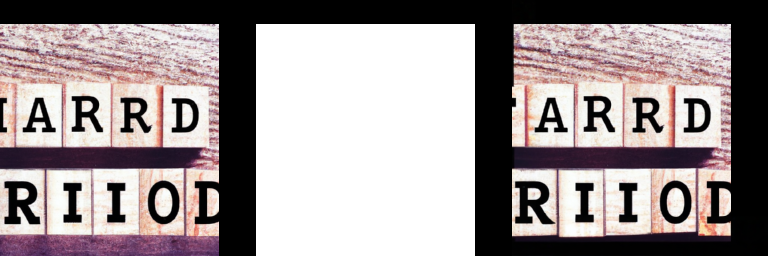

100%|████████████████████████████████████████████████████████████████████████| 2/2 [00:19<00:00,  9.50s/it]


In [5]:
for index in tqdm(range(2)):
    canvas.generate(content[index]).move_cursor()

---

In [6]:
# END